In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import cv2

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
os.listdir('/kaggle/input')
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

['ecg-dataset']

In [3]:
BASE_DIR = '/kaggle/input/ecg-dataset/ecg-dataset'

image_path = os.path.join(BASE_DIR, 'ECG Images of Myocardial Infarction Patients (240x12=2880)/MI(6).jpg')
image = cv2.imread(image_path)

print(image.shape)

plt.figure(figsize=(20, 8))
plt.imshow(image)


(1572, 2213, 3)


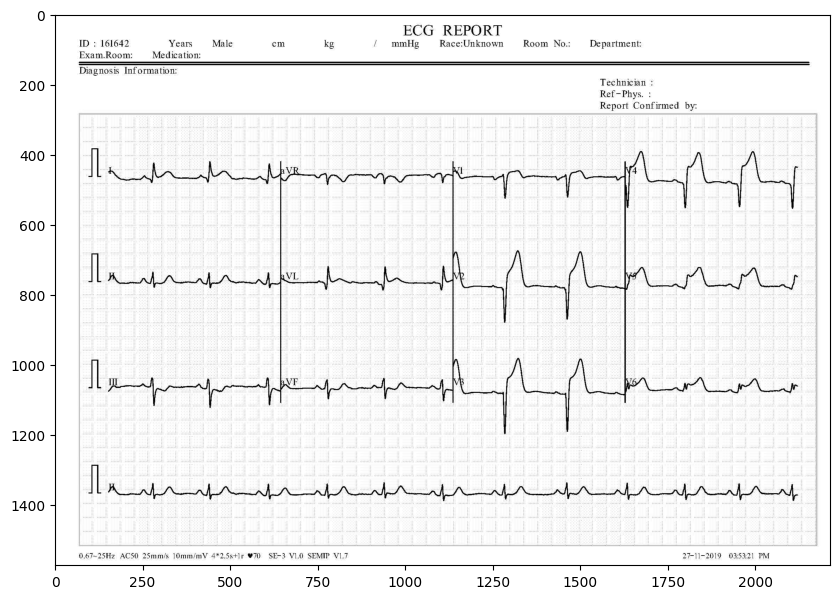

In [4]:
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(10, 8))
plt.imshow(img_gray, cmap='gray')

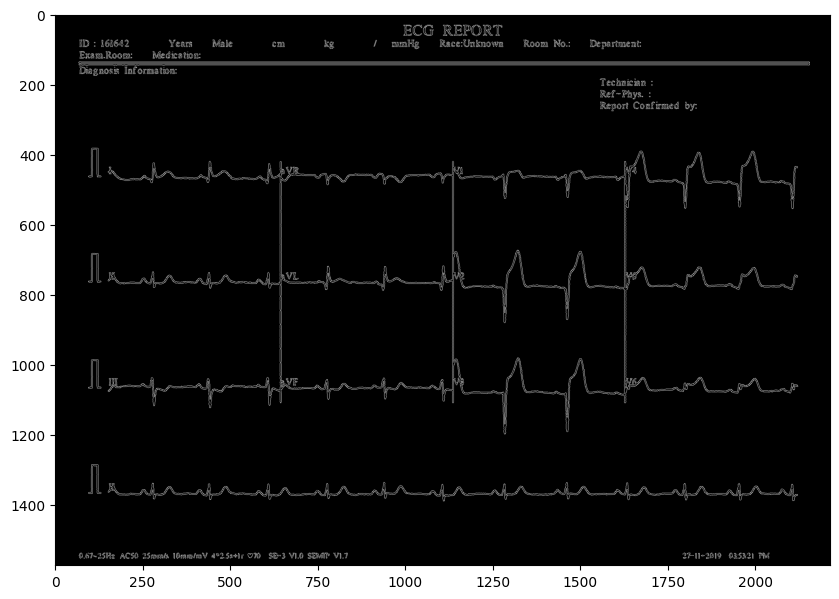

In [5]:
img_edges = cv2.Canny(img_gray, 800, 800, apertureSize=3)

plt.figure(figsize=(10, 8))
plt.imshow(img_edges, cmap='gray')

In [6]:

# Output base directory for transformed images
OUTPUT_DIR = '/kaggle/working/processed_ecg'

# Function to process images in a folder
def process_folder(input_folder, output_folder):
    # Create corresponding output folders
    os.makedirs(output_folder, exist_ok=True)
    
    for filename in os.listdir(input_folder):
        img_path = os.path.join(input_folder, filename)
        
        # Skip non-image files and subfolders
        if not (filename.endswith('.jpg') or filename.endswith('.png')):
            continue
        
        # Read the image
        image = cv2.imread(img_path)
        if image is None:
            print(f"Failed to load {img_path}")
            continue

        # Apply transformations
        img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        img_edges = cv2.Canny(img_gray, 800, 800, apertureSize=3)
        
        # Create output file paths
        gray_output_path = os.path.join(output_folder, f"gray_{filename}")
        edges_output_path = os.path.join(output_folder, f"edges_{filename}")
        
        # Save the processed images
        cv2.imwrite(gray_output_path, img_gray)
        cv2.imwrite(edges_output_path, img_edges)

        # Display some sample images (optional)
        if filename.endswith('1.jpg'):  # Display only one image per folder
            plt.figure(figsize=(15, 5))
            
            plt.subplot(1, 3, 1)
            plt.title('Original')
            plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            
            plt.subplot(1, 3, 2)
            plt.title('Grayscale')
            plt.imshow(img_gray, cmap='gray')
            
            plt.subplot(1, 3, 3)
            plt.title('Edges')
            plt.imshow(img_edges, cmap='gray')
            
            plt.show()

# Loop through all folders in BASE_DIR
for folder in os.listdir(BASE_DIR):
    folder_path = os.path.join(BASE_DIR, folder)
    
    if os.path.isdir(folder_path):  # Only process folders
        output_folder = os.path.join(OUTPUT_DIR, folder)
        print(f"Processing folder: {folder}")
        
        process_folder(folder_path, output_folder)

print("Processing complete!")


Processing folder: ECG Images of Patient that have abnormal heartbeat (233x12=2796)
Processing folder: ECG Images of Patient that have History of MI (172x12=2064)
Processing folder: Normal Person ECG Images (284x12=3408)
Processing folder: ECG Images of Myocardial Infarction Patients (240x12=2880)
Processing complete!


In [7]:
import os
import shutil

# Base directory containing processed ECG images
WORKING_DIR = '/kaggle/working/processed_ecg'

# Separate images into 'grays' and 'edges' folders
for folder in os.listdir(WORKING_DIR):
    folder_path = os.path.join(WORKING_DIR, folder)
    
    if not os.path.isdir(folder_path):
        continue

    # Create 'grays' and 'edges' subfolders inside each processed folder
    grays_folder = os.path.join(folder_path, 'grays')
    edges_folder = os.path.join(folder_path, 'edges')

    os.makedirs(grays_folder, exist_ok=True)
    os.makedirs(edges_folder, exist_ok=True)

    # Move images to their respective folders
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        
        if filename.startswith('gray_'):
            shutil.move(file_path, os.path.join(grays_folder, filename))
        elif filename.startswith('edges_'):
            shutil.move(file_path, os.path.join(edges_folder, filename))

print("Images separated into 'grays' and 'edges' folders!")


Images separated into 'grays' and 'edges' folders!


In [8]:
!zip -r /kaggle/working/processed_ecg.zip /kaggle/working/processed_ecg



  adding: kaggle/working/processed_ecg/ (stored 0%)
  adding: kaggle/working/processed_ecg/ECG Images of Patient that have History of MI (172x12=2064)/ (stored 0%)
  adding: kaggle/working/processed_ecg/ECG Images of Patient that have History of MI (172x12=2064)/edges/ (stored 0%)
  adding: kaggle/working/processed_ecg/ECG Images of Patient that have History of MI (172x12=2064)/edges/edges_PMI(103).jpg (deflated 17%)
  adding: kaggle/working/processed_ecg/ECG Images of Patient that have History of MI (172x12=2064)/edges/edges_PMI(124).jpg (deflated 19%)
  adding: kaggle/working/processed_ecg/ECG Images of Patient that have History of MI (172x12=2064)/edges/edges_PMI(127).jpg (deflated 19%)
  adding: kaggle/working/processed_ecg/ECG Images of Patient that have History of MI (172x12=2064)/edges/edges_PMI(93).jpg (deflated 18%)
  adding: kaggle/working/processed_ecg/ECG Images of Patient that have History of MI (172x12=2064)/edges/edges_PMI(106).jpg (deflated 19%)
  adding: kaggle/working

In [1]:
import os
import shutil

# Base directory containing the processed images
WORKING_DIR = '/kaggle/working/processed_ecg'

# Create separate dataset folders
GRAYS_DIR = '/kaggle/working/grays_dataset'
EDGES_DIR = '/kaggle/working/edges_dataset'

os.makedirs(GRAYS_DIR, exist_ok=True)
os.makedirs(EDGES_DIR, exist_ok=True)

# Loop through each folder and move images to the respective dataset folders
for folder in os.listdir(WORKING_DIR):
    folder_path = os.path.join(WORKING_DIR, folder)
    
    if not os.path.isdir(folder_path):
        continue

    for subfolder in ['grays', 'edges']:
        subfolder_path = os.path.join(folder_path, subfolder)
        
        if os.path.isdir(subfolder_path):
            for filename in os.listdir(subfolder_path):
                src = os.path.join(subfolder_path, filename)

                # Move images to their respective dataset folder
                if subfolder == 'grays':
                    dst = os.path.join(GRAYS_DIR, filename)
                elif subfolder == 'edges':
                    dst = os.path.join(EDGES_DIR, filename)

                shutil.move(src, dst)

print("Images separated into two datasets: 'grays' and 'edges'!")


FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/working/processed_ecg'

In [9]:
from IPython.display import FileLink
FileLink(r'processed_ecg.zip')

/kaggle/working/processed_ecg.zip